<a href="https://colab.research.google.com/github/Kuznetsova-Olga/NLP_project/blob/main/%D0%A0%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%D1%81_%D0%B4%D0%B0%D1%82%D0%B0%D1%81%D0%B5%D1%82%D0%BE%D0%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

In [2]:
path = kagglehub.dataset_download("edenbd/150k-lyrics-labeled-with-spotify-valence")

100%|██████████| 53.7M/53.7M [00:02<00:00, 23.6MB/s]

Extracting files...


In [3]:
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/edenbd/150k-lyrics-labeled-with-spotify-valence/versions/1


**Загрузка датасета**

In [9]:
import pandas as pd
data = pd.read_csv('/root/.cache/kagglehub/datasets/edenbd/150k-lyrics-labeled-with-spotify-valence/versions/1/labeled_lyrics_cleaned.csv')

In [10]:
data

,Unnamed: 0,artist,seq,song,label
0,0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday,0.626
1,1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die,0.630
2,2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside,0.240
3,3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot,0.536
4,4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds,0.371
...,...,...,...,...,...
158348,158348,Adam Green,"And we live on borrowed time,\r\nBut this head...",Friends of Mine,0.737
158349,158349,Adam Green,Frozin in time forever\r\nCarrying that torch ...,Frozen in Time,0.482
158350,158350,Adam Green,Hard to be a girl. \r\nSo nice to be a boy. \r...,Hard to Be a Girl,0.733
158351,158351,Adam Green,"I want to chose to die,\r\nAnd be buried with ...",I Wanna Die,0.361


**Предобработка текста**

In [33]:
#Подгрузка стоп-слов
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
nltk.download('averaged_perceptron_tagger') #для part of speech tagging
from nltk.tokenize import SpaceTokenizer

import matplotlib
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [34]:
#from pandas.io.parsers.readers import TextFileReader
def clean_text(text):
  text = text.lower()
  text = re.sub(r"what's", "what is ", text)
  text = re.sub(r"’", "'", text)
  text = re.sub(r"\'s", " ", text)
  text = re.sub(r"\'ve", " have ", text)
  text = re.sub(r"can't", "can not ", text)
  text = re.sub(r"haven't", "have not ", text)
  text = re.sub(r"don't", "do not ", text)
  text = re.sub(r"wouldn't", "would not ", text)
  text = re.sub(r"i'm", "i am ", text)
  text = re.sub(r"\'re", " are ", text)
  text = re.sub(r"\'d", " had ", text)
  text = re.sub(r"\'d", " would ", text)
  text = re.sub('2', 'two', text)
  text = re.sub(r"\'ll", " will ", text)
  text = re.sub(r"\'scuse", " excuse ", text)
  text = re.sub(r'says, "', 'says: "', text)
  text = re.sub("in'", 'ing', text)
  text = text.replace("\n", "")
  text = text.replace("\t", "")
  text = text.replace("'em", "them")
  text = text.replace("gotta", "got to")
  text = text.replace("gonna", "going to")
  text = text.replace("wanna", "want to")
  text = text.replace("lemme", "let me")
  text = text.replace("gimme", "give me")
  text = text.replace("outta", "out of")
  text = text.replace("kinda", "kind of")
  text = text.strip(' ')
  text = re.sub("[^a-zA-Z]"," ", text)
  # токенизируем слова
  text = nltk.word_tokenize(text, language = "english")
  # лемматирзируем слова
  lemmatize = nltk.WordNetLemmatizer()
  text = [lemmatize.lemmatize(word) for word in text]
  #либо же text = [lemmatize.lemmatize(word) for word in text if lemmatize.lemmatize(word) not in stopwords.words('english')] в случае удаления стоп-слов
  text = " ".join(text)
  return text

In [35]:
def prepare_data(data):
  data['seq'] = data['seq'].map(lambda sentence : clean_text(sentence)) # делаем лямбда-функцию, которая каждую песню подает в функцию по очистке текста.
  return data

In [36]:
data = prepare_data(data)

In [ ]:
data

**Количество песен у разных авторов. Самые популярные авторы**

In [38]:
artists = []
for textt in data['artist']:
  artists.append(textt)
#print(artists, sep=',')
print(len(artists))

158353


In [42]:
from collections import Counter
bow_counter = Counter(artists)
print(bow_counter)

In [44]:
import operator
# можно также отсортировать словарь с помощью пакета operator
sorted_counter = dict(sorted(bow_counter.items(), key=operator.itemgetter(1), reverse=
True))
print(sorted_counter)

In [45]:
new_dict = {key:val for key,val in sorted_counter.items() if val >= 250}
print(new_dict)

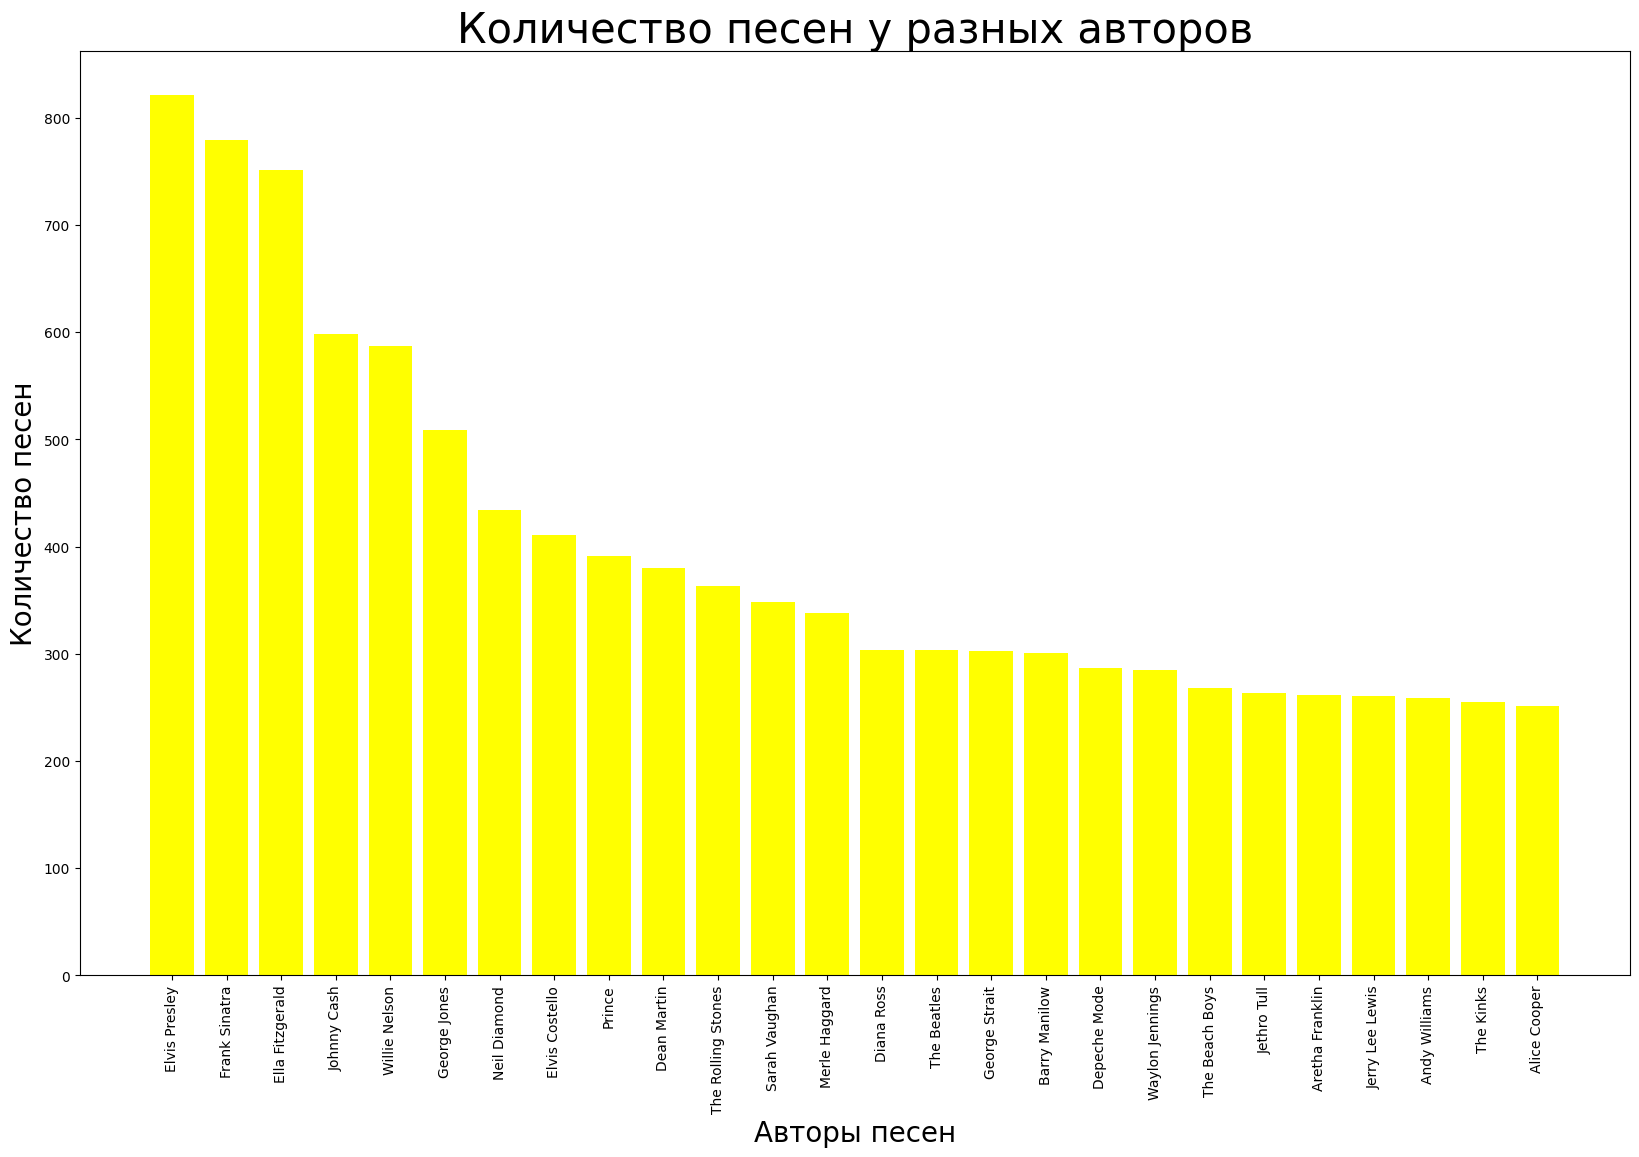

In [46]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(20, 12)) # указываем, какой масштаб визуализации
plt.title('Количество песен у разных авторов', fontsize=30, fontname='Times New Roman')

plt.xlabel('Авторы песен', fontsize=20)
plt.ylabel('Количество песен', fontsize=20)
plt.bar([str(i) for i in new_dict.keys()], new_dict.values(), color = 'yellow')
plt.xticks(rotation=90)
plt.show()

Самый популярный автор - Элвис Пресли. После него по шкале популярности следуют Френк Синатра, Элла Фицджеральд, Джонни Кэш, Вилли Нельсон и так далее

**Частотность слов**

In [47]:
from nltk.tokenize import word_tokenize
from collections import Counter
token = []
for text in data['seq']:
    t = word_tokenize(text)
    token.extend(t)
bow_counter = Counter(token)
result = bow_counter.most_common(100)

In [48]:
text1 = []
for element in bow_counter.most_common(100):
  if element[0] not in stopwords.words('english'): #оставляем только те слова, которые не являются стоп-словами
    text1.append(element)

In [49]:
keys=[]
values = []
for element in text1:
  keys.append(element[0])
  values.append(element[1])
print(keys, end=',')

In [50]:
print(values, end=',')

In [51]:
dictionary = dict(zip(keys, values)) #из двух списков делаем один словарь
dictionary

In [53]:
import operator
# можно также отсортировать словарь с помощью пакета operator
sorted_counter = dict(sorted(dictionary.items(), key=operator.itemgetter(1), reverse=
True))
print(sorted_counter)

**Визуализация полученных результатов**

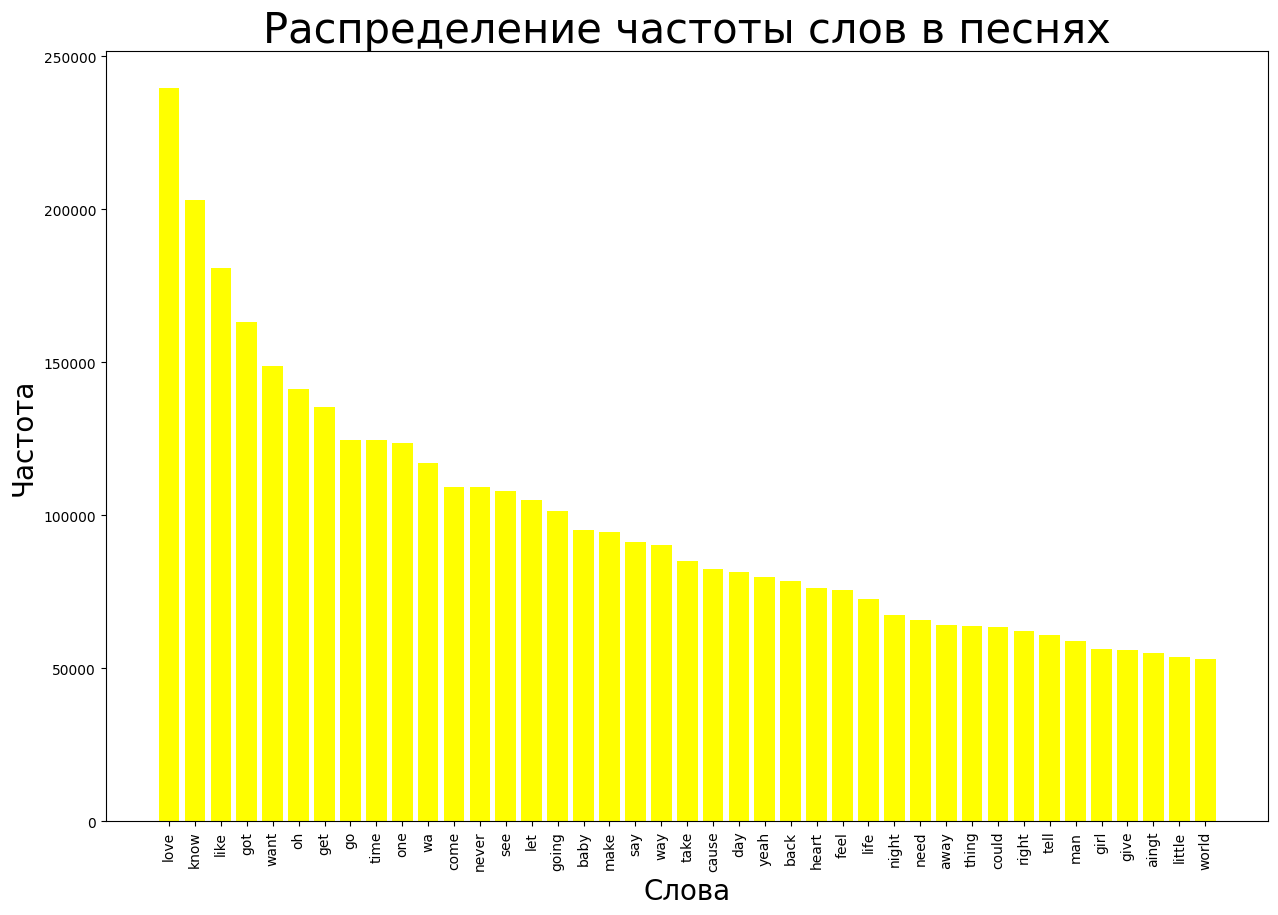

In [54]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(15, 10))
plt.title('Распределение частоты слов в песнях', fontsize=30, fontname='Times New Roman', color='black')
plt.xlabel('Слова', color='black', fontsize=20)
plt.ylabel('Частота',color='black', fontsize=20)
plt.bar([str(i) for i in sorted_counter.keys()], sorted_counter.values(), color='yellow')
plt.xticks(rotation=90)
plt.show()